In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [78]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [22]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
measure = Base.classes.measurement
station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [62]:
# Find the most recent date in the data set.
recent_date = session.query(func.max(measure.date)).first()
recent_date

('2017-08-23',)

The most recent date is 2017-08-23
One year before the most recent date is 2016-08-23


<Axes: title={'center': 'Hawaii Precipitation by Date'}, xlabel='Date', ylabel='Inches'>

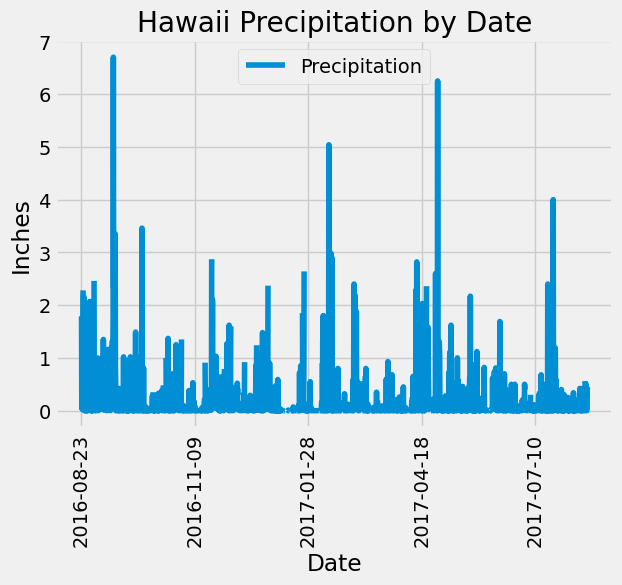

In [127]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
print(f'The most recent date is {recent_date[0]}')

# Calculate the date one year from the last date in data set.
oneyr_before = dt.date.fromisoformat(recent_date[0]) - dt.timedelta(days=365)
print(f'One year before the most recent date is {oneyr_before}')

# Perform a query to retrieve the data and precipitation scores
date_prcp = session.query(measure.date, measure.prcp).\
    filter(measure.date <= recent_date[0]).\
    filter(measure.date >= oneyr_before).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df_date_prcp = pd.DataFrame(date_prcp, columns=["Date", "Precipitation"])

# Sort the dataframe by date
df_date_prcp.sort_values(by= "Date", inplace=True,)
#df_date_prcp.dropna(inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
df_date_prcp.plot(x="Date", y="Precipitation", rot= 90,\
                   xlabel="Date", ylabel="Inches",\
                      title="Hawaii Precipitation by Date")

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
df_date_prcp.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [164]:
# Design a query to calculate the total number of stations in the dataset
num_stations = session.query(measure.station).distinct().count()
num_stations

9

In [169]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(measure.station, func.count(measure.station)).\
    group_by(measure.station).order_by(func.count(measure.station).desc()).\
    all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

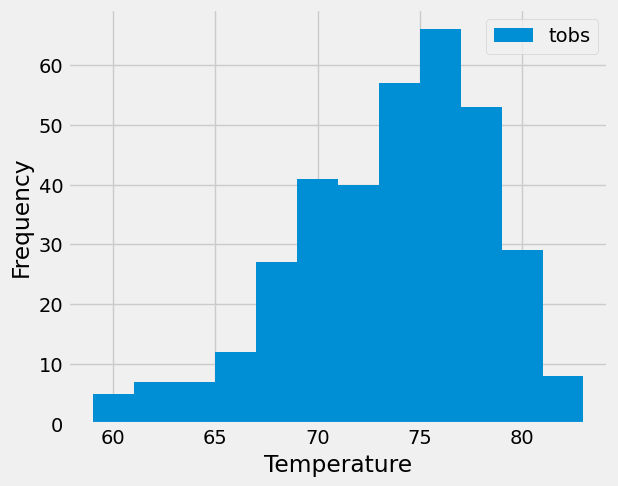

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()